In [2]:
import pandas as pd
pd.options.plotting.backend = "plotly"
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:75% !important; }</style>"))
import dask.dataframe as dd
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
from dask.diagnostics import ProgressBar
ProgressBar().register()
import dask.multiprocessing
dask.config.set(scheduler='threads')
from tqdm.notebook import tqdm
import plotly.graph_objects as go 

In [3]:
import yaml
import base64
import os
cred = yaml.load(base64.b64decode(open('/home/jovyan/.secrets/tlinc-dremio.yaml.b64','r').read()),Loader=yaml.BaseLoader)
os.environ.update(cred)
cred = yaml.load(base64.b64decode(open('/home/jovyan/.secrets/tlinc-db-retail.yaml.b64','r').read()),Loader=yaml.BaseLoader)
os.environ.update({k:str(v) for k,v in cred.items()})

In [4]:
import pandas as pd
import numpy as np
from tl_datasource.dremio import get_async_dremio_connection, read_sql_to_pandas_aioodbc

In [17]:
async with get_async_dremio_connection() as conn:
    query = f'''
        SELECT date_trunc ('DAY' , cast(creation_date as timestamp)) as trx_day, product_type,
        count(*) as product_count,
        sum(price) as price FROM "sp_IC".TR."stat_ancillaries_total"
        where date_trunc ('DAY' , cast(creation_date as timestamp)) between '2021-10-12' and '2021-11-12'
        group by date_trunc ('DAY' , cast(creation_date as timestamp)), product_type
    '''
    df = await  read_sql_to_pandas_aioodbc(query, conn)

In [18]:
df.product_type.unique()

array(['upgrade', 'car', 'gift_certificate', 'free_refund', 'lounge',
       'seat', 'extra_seat', 'excursion', 'hotel', 'pet', 'meal',
       'flight_change', 'foodbox', 'prepay', 'sms', 'fast_track', 'bag',
       'insurance', 'aeroexpress', 'auto_checkin', 'transfer'],
      dtype=object)

In [19]:
df = df[df.product_type.isin (['bag', 'free_refund', 'seat', 'extra_space', 'pet', 'meal', 'gift_certificate', 'lounge', 'prepay', 'extra_seat', 'auto_checkin', 'foodbox', 'lounge TM', 'fast_track'])]

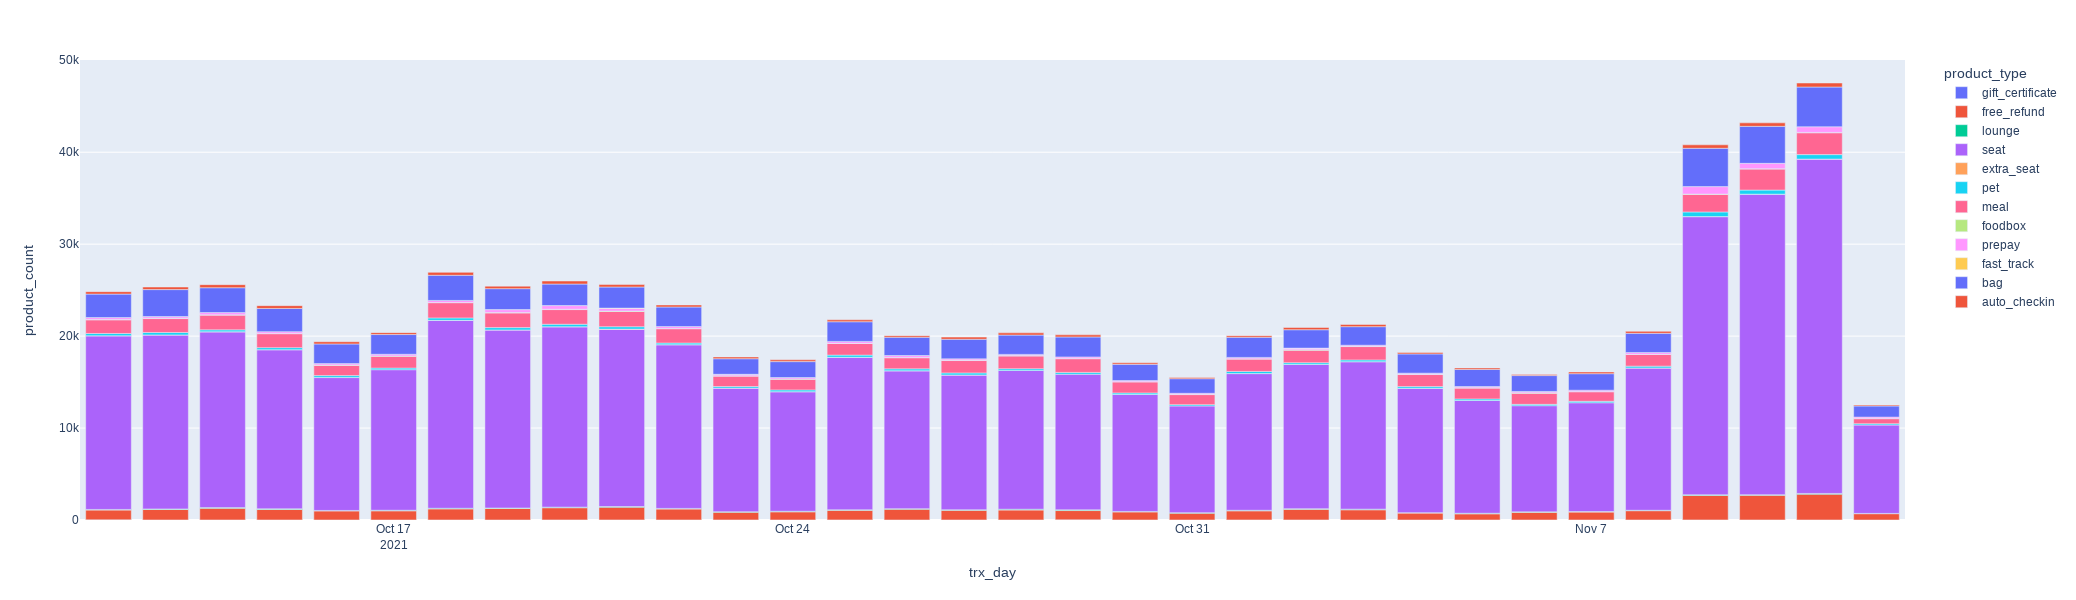

In [20]:
import plotly.express as px
long_df = px.data.medals_long()
fig = px.bar(df, x="trx_day", y="product_count", color="product_type",  width=2000, height=600)
fig.update_layout(
)
    
fig.show()

<AxesSubplot:xlabel='trx_day', ylabel='product_count'>

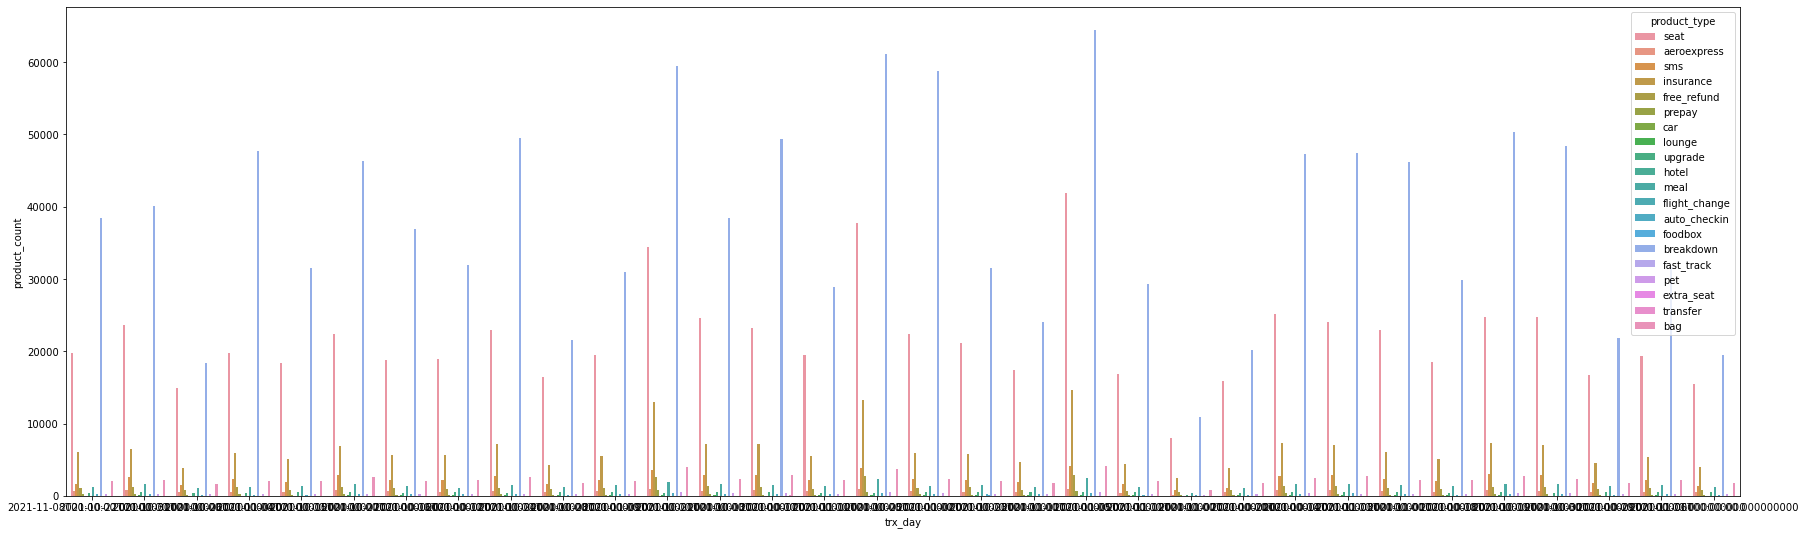

In [10]:
plt.figure(figsize=(30,9))
sns.barplot(data=df, x='trx_day', y='product_count', hue='product_type')